# Exchange price analysis of cryptocurrencies
## Team: Prior

## Abstract <a name="abstract"></a>
This project implements a bayesian workflow to explores what distributions best fit the price of cryptocurrencies, and whether predictions of cryptocurrencies can be made based on the price of bitcoin.


# Table of contents
1. [Abstarct](#abstract)
2. [Introduction](#introduction)
3. [Data analysis](#analysis)
4. [Methods](#methods)
5. [Results](#results)
6. [Discussion and Conclusions](#conclusions)
7. [References](#references)
8. [Appendix](#appendix)


## Introduction <a name="introduction"></a>

Today there are 2068 different crytocurrencies according to coinmarketcap.com(ref). A about a year ago there where "only" 753(check) (ref). The growth of the industry has been subsatantial, with many people having gained incredible fortunes while other have lost it all.  

With as many coins as there are today, it's increadible that Bitcoin has been able to keep its majority market share of 55.0%, but for many, the only cryptocurrency they know is Bitcoin. 
The original goal of Bitcoin was to work as any other currency, but many see cryptocurrencies as commodities, and use cryptocurrencies as investments instead a means to complete transactions.  

But how viable are cryptocurrencies as an investment? Can you build investments portfolios of only different cryptocurrencies? These are some of the questions we seek answers to in this project by implementing a bayesian workflow to invetigate the distributions of cryptocurrencies, and investigating wether there are strong trends in the cryptocurrency market.

Our hypothesis is that you can't build an investment protfolio based on only cryptocurrency because we suspect that they will correlate to highly. We further hypothesize that the price of all cryptocurrencies is heavily affected by the price of Bitcoin, because it is the biggest and most well know cryptocurrency, and thus also the cryptocurrency where people have invested most of their money.

Because of the vast amount of different cryptocurrencies, we've narrowed down the amount of different crytocurrencies to 10 which are divided in to two groups, big and small cryptocurrencies. We've seperated the coins into big crytocurrencies from small crytocurrencies by setting an arbitrary constraint on their marketcap is by their marketcap. marketcap we chose to differentiate the two groups was XXX, which gave us Bitcoin, Litecoin, Ethereum, Ethereum Classic and DASH, as big coins, and XXX, XXX, XXX, XXX, XXX as small coins.

This project has two objectives. One is to analyse the variation of the exchange price to USD of the coins, and if they can be fit with certain distributions in order to predict potential price variation for a new coin. Second is to see if exchange price for certain coins can be predicted based the exchange price of BTC (Bitcoin).

## Data analysis <a name="analysis"></a>

The data set we used was created by Coin Metrics (ref) who themself used coinmarketcap.com data. The complete data set has 21400 data points and is a montly timeseries of market capitalization, price, exchange volume, transaction count, adjusted transaction volume, generated coins, fees, active addresses, average difficulty, payment count, median transaction value median fee, block ssize and block count. The time range of the timeseries depends on the cryptocurrency, but some go as far back as 2014, and they all end at November 29 2018.

#### Features
* Market cap (USD)
* Price (USD)
* Fees
* Transaction volume

Every feature here is positive real (continuous) value with the exception of fees, as they can be also equal to zero. Further selection (narrowing down) was based on marketcap. As a result the following coins ended up in the final set.
#### Price variation:
##### Small coins (marketcap < 160 million on 29th November 2018):
* DigiByte (DGB)
* Gas (GAS)
* PIVX (PIVX)
* Vertcoin (VTC)
* Waves (WAVES)
* Verge (XVG)

##### Big coins (marketcap > 1000 million on 29th November 2018):
* Bitcoin (BTC)
* Ethereum (ETH)
* Litecoin (LTC)
* Cardano (ADA)
* Bitcoin Cash (BCH)

#### Price prediction (hand picked popular coins):
* Bitcoin (BTC)
* Ethereum (ETH)
* Litecoin (LTC)
* Dash (DASH)
* Ethereum Classic (ETC)

#### Time period
For the hand picked currencies limiting the time frame of the data to between the 24th July 2016 and 26th November 2018, gives us a full data set, which means that there isn't any missing data, which should make the preprocessing of the data easier.

However, for the other coins the time period was taken based on shortest time-period without any missing values of available coins small and big respectively. As a result for small coins the time period was based on Gas coin with 512 consequtive days, and big coins were based on Cardano with consequtive 425 days. For both data sets the last day is 29th November 2018.

### Visualizations

##### Crypto currencies by marketcap

Index(['Symbol', 'Name', 'Market Cap (US $)', 'Price (US $)',
       'Circulating Supply', 'Volume (24h)', ' 1h (%)', ' 24h (%)', ' 7d (%)'],
      dtype='object')


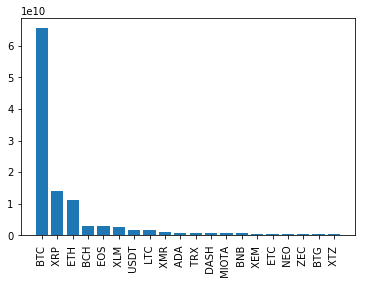

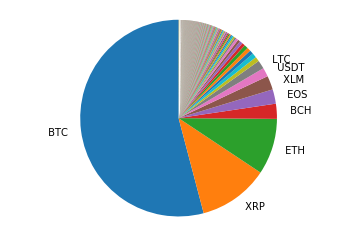

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/snapshot/november-25.csv')
df = df.drop(columns='#')

# Remove all coins with no market cap information
df = df.dropna()
df = df.mask(df.eq('None')).dropna()
print(df.columns)

df['Market Cap (US $)'] = pd.to_numeric(df['Market Cap (US $)'])

names = df['Symbol']
m_caps = df['Market Cap (US $)'].values

plt.bar(names[0:20], m_caps[0:20])
plt.xticks(rotation='vertical')

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
names_top8 = [name if i < 8 else '' for i, name in enumerate(names)]
fig1, ax1 = plt.subplots()
ax1.pie(m_caps, labels=names_top8, autopct=None, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Correlation between some of the largest cryptos

## Methods <a name="methods"></a>
Originally we had also an objective to analyse dependence of transaction volume of each coin on its' transaction fees. However given the time and problems we encountered during the price analysis we decided to narrow our objectives.

We decided to split the work into two objectives, one is analysis of price variation and second is price prediction. For price variation we were interested if coins had similarity in the variation distribution as well as value range over which they were varying. For the price prediction we were interested if we could predict price of other coins given the price of the Bitcoin.

### Price variation

For price variation hierarchichal model was chosen as we believed that coins should behave similarly and that they have some common hierarchical prior to the behaviour they are expressing. Hierarchical model was tested using different distributions and as a consequence of the results of preliminary distributions, we ended up transforming the data and applying different set of distributions in our analysis. Further details are discussed in the Results section.

In additon, at first, set of coins with small marketcap was evaluated and final distributions in hierarchical model were applied to big coins to see what were differences and similarities. All the models were run with default Stan parameters.

### Price prediction

The hypothesis that the model is built on is that the prices of cryptocurrencies can be predicted base don the price of bitcoin. The model we'll build is a simple linear model of the form

\begin{equation}
 price_{X,t} = \alpha + \beta \cdot price_{Bitcoin,t}
\end{equation}

where $X$ is the any cryptocurrency and t as a point in time, and $price_{X,t}$ is the price of $X$ at time $t$.

## Results <a name="results"></a>
`Feel free to change here if you did something differently`

The bayesian workflow was done somewhat similarly to the example demonstrated by Michael Betancourt(ref). The difference is that 
we do not have such great domain expertise and thus did not know how specifically choose our prior. Which lead to different evaluation of the model. In the example the ranking and z-s scores were used, we on other hand tried out different models and compared the psis-loo values of these models.

### Price variation

According to the principled bayesian workflow, we were supposed to first build a model based on our prior knowledge and then look and use the data, in order to adapt and modify our model.

#### First steps
Due to the first step resulting in failure we decided to include the stan files of this section in the Appendix as well as the convergance results (n_eff, R-hat, k-values). The python code used to run these files can be seen in the next section.

Given that exchange prices we were dealing with were positive continuous values, the hierarchichal model was thus build on lognormal hierarchical prior, as normal could take real values below 0 and lognormal was restricted to values above 0. As we were unsure what posterior distribution would the prices follow given the hierarchical prior, we decided to test lognormal as well as chi-square, inverse chi-square and weibull distributions.

* lognormal (Stan: y ~ lognormal(mu, sigma))
\begin{equation}
LogNormal(y|\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}\frac{1}{y}exp(-\frac{1}{2}\frac{(log(y)-\mu)^2}{sigma^2})
\end{equation}


* chi-square (Stan: y ~ chi_square(nu))
\begin{equation}
ChiSquare(y|\nu)=\frac{2^{-\nu/2}}{\Gamma(\nu/2)}y^{\nu/2 -1}exp(-\frac{1}{2}y)
\end{equation}


* inverse chi-square (Stan: y ~ inv_chi_square(nu))
\begin{equation}
InvChiSquare(y|\nu)=\frac{2^{-\nu/2}}{\Gamma(\nu/2)}y^{-\nu/2 -1}exp(-\frac{1}{2}\frac{1}{y})
\end{equation}



* weibull (Stan: y ~ weibull(alpha, sigma))
\begin{equation}
Weibull(y|\alpha,\sigma)=\frac{\alpha}{\sigma}
(\frac{y}{\sigma})^{\alpha-1}exp(-(\frac{y}{\sigma})^{\alpha})
\end{equation}

In addition we wanted to see if normal distribution would be fit at all with the stan framework given that we think it should be inappropriate model for this type of data.

* Normal (Stan: y ~ normal(mu, sigma))
\begin{equation}
LogNormal(y|\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}\frac{1}{y}exp(-\frac{1}{2}\frac{(y-\mu)^2}{sigma^2})
\end{equation}


Surprisingly the normal model did converge as R-hat values are 1.0 for all the parameters and generated quantities (can be seen in appendix). However, the psis-loo value of -9917  indicates that the model is bad if we compare to the good psis-loo values that the factory data analysis on week 8 of the course was yielding (in the ballpark of -130). 

The k-values for all the models indicate that psis-loo values indeed can be tursted. The best distribution turned out to be Weibull distribution with -2715 psis-loo value, while the worst is inverse chi-square with -15251 psis-loo value. The psis-loo of -2715 is still bad, thus now the next step according to the Michael Betancourt workflow example is to look at the data and investigate on how can we improve our model.

The raw data for small coins can be seen below as flattened and as individual coins.

<table><tr>
    <td> <img src="report_imgs/flat_prices.png" style='width: 100%; object-fit: contain'/></td>
    <td><img src="report_imgs/ind_prices.png" style='width: 100%; object-fit: contain'/></td>
</tr></table>

Looking at the flattened data can be misleading to what the coins resemble individually, thus graph with individual raw prices is helpful to some extend. We can see a weird behaviour where Gas coin, given small market cap has quite big price magnitude in its' variation. However, differentiating between other coins is quite difficult from this perspective. Therefore, we decided to take logarithm of the raw price values in order to bring it down to more manageble scale.


<table><tr>
    <td> <img src="report_imgs/sm_log_prices.png" style='width: 100%; object-fit: contain'/></td>
    <td> <img src="report_imgs/big_log_prices.png" style='width: 100%; object-fit: contain'/></td>
</tr></table>

On the logarithm scale we can immediately see that prices tend to follow one of the two trends in price exchange, the cheap and expensive respectively. It might also seem like the marketcap affects somehow as into which category does the coin fall into. However, if we compare the graphs of big and small coins we can see that in both graphs the same phenomenon is happening, as coins with comparable marketcap value tend to be either cheap or expensive but not on the middle (we can see that coins with small market cap value would fall in between the coins with the big market cap value, thus it would be difficult to treat all the coins similarly).

This type of phenomenon suggests that there should be mixture model for the prior as then the distribution of the individual coin would have the parameters constrained to one of the two peaks of the bimodal distribution. However, given the fact that we are fairly new with using the Stan framework we do not know how to apply mixture of distributions in place of prior. Search on the web gave some hints, but they did not end up helping us.

What we can do however is split the small and big coins further into cheap and expensive sub-sets and analyse those sub-sets separately with the hierarchical models that we have. However, given that logarithm gave us such contrast in the understanding the data we decided to keep the data on the logarithm scale and apply different set of distributions which would be appropriate for the transformed data.

#### Logarithm approach
`left for tomorrow` As can be seen from the plots? coin prices follow

Distributions:

* Cauchy (Stan: y ~ cauchy(mu, sigma))
\begin{equation}
Cauchy(y|\mu,\sigma)=\frac{1}{\pi\sigma}\frac{1}{1+((y-\mu)/\sigma^2)}
\end{equation}

* Laplace (Stan: y ~ double_exponential(mu, sigma))
\begin{equation}
DoubleExponential(y|\mu,\sigma)=\frac{1}{2\sigma}exp(-\frac{|y-\mu|}{sigma})
\end{equation}

* logistic (Stan: y ~ logistic(mu, sigma))
\begin{equation}
Logistic(y|\mu,\sigma)=\frac{1}{\sigma}exp(-\frac{y-\mu}{sigma})(1+exp(-\frac{y-\mu}{\sigma}))^{-2}
\end{equation}

### Price prediction

Our hypothesis was that the price of cryptocurrencies can be predicted based on the price of bitcoin. And in order to get an idea of whether our hypothesis is correct or not we'll start by plotting the price of bitcoin against the price of other coins. We hope that we would be able to see some type of linear relationship by plotting this.

![title](prediction/prices.png)

The relationship between the prices is not perfectly linear but we can definitely see a strong linear relationship. This makes us hopefull that a simple linear model might very well be suitable to predict the price Ethereum, Litecoin, Ethereum Classic or DASH from the price of Bitcoin.  

Next we will build a bayesian linear model for the prediction of the price using Stan. As we have the price data for all the coins all the way back to 2016, and don't have any prior data about the distributions we will let the likelihood function determine the predictive posterior distribution completely by setting a weak uniform prior.
We'll use a gaussian model for the unexplained variance.

Without looking much more into it, it seems that there is more volatility at high prices, which makes sense when taking the in to account the high volatility period at the start of 2017 when markets where booming.

#### Gaussian linear model in Stan

In [33]:
with open('prediction/lin_ex2.stan') as file:
    print(file.read())

data {
    int<lower=0> N;	// number of data points
    int<lower=0> M;	// number of prediction points
    vector[N] x;	// Coin 1
    vector[N] y;	// Coin 2
    vector[M] xpreds;	// Coin 1 hypothetical future prices
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = alpha + beta*x;
}
model {
    alpha ~ normal(0, 1);
    beta ~ normal(0, 1);
    y ~ normal(mu, sigma);
}
generated quantities {
    vector[M] ypreds; // Predictions based on hypothetical future prices of coin 1
    vector[N] log_lik;
    for(i in 1:M) {
        ypreds[i] = normal_rng(alpha + beta*xpreds[i], sigma);
    }
    for (i in 1:N){
        log_lik[i] = normal_lpdf(y[i] | mu[i], sigma);
    }
}



#### Modeling the price of DASH as a function of the price of Bitcoin
We'll select 5 hypotehtical future prices of bitcoin.

In [79]:
data = pd.read_csv('data/selected/combined.csv', delimiter=",")
n = data.shape[0]
m = 5
x = data[['BTC price(USD)']].values.flatten()[0:n]
y = data[['DASH price(USD)']].values.flatten()[0:n]
p = np.linspace(data[['BTC price(USD)']].min(), data[['BTC price(USD)']].max(), m)

In [80]:
import stan_utility
model = stan_utility.compile_model('prediction/lin_ex2.stan')
model_data = dict(N=n,M=m,x=x,y=y,xpreds=p)
fit = model.sampling(data=model_data, seed=74749)
samples = fit.extract(permuted=True)

Using cached StanModel


#### Check Rhats and effective number of samples.

In [81]:
print(fit)

Inference for Stan model: anon_model_d9c8feb9b90720a2414e32da41a5c2d3.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha         -1.23    0.02   1.01  -3.21  -1.88  -1.24  -0.56   0.79   1768    1.0
beta           0.05  9.6e-6 6.3e-4   0.05   0.05   0.05   0.06   0.06   4339    1.0
sigma        114.49    0.06   2.71 109.41 112.62 114.37 116.35 120.02   1995    1.0
mu[1]         34.61    0.02    1.0  32.61  33.97  34.62  35.28   36.6   2001    1.0
mu[2]         34.93    0.02    1.0  32.92  34.29  34.94   35.6  36.91   2005    1.0
mu[3]         34.55    0.02    1.0  32.55   33.9  34.56  35.21  36.53   2000    1.0
mu[4]         34.41    0.02    1.0  32.41  33.76  34.41  35.07  36.39   1999    1.0
mu[5]         34.56    0.02    1.0  32.56  33.91  34.57  35.23  36.55   2001    1.0
mu[6]          34.6    0.02    1.0  32.59  33.95   34.6

We'll check divergence a and treedepth

In [82]:
stan_utility.check_treedepth(fit)
stan_utility.check_div(fit)

0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
0.0 of 4000 iterations ended with a divergence (0.0%)


Everything seems so good so far and we'll continue to plot our predictions.

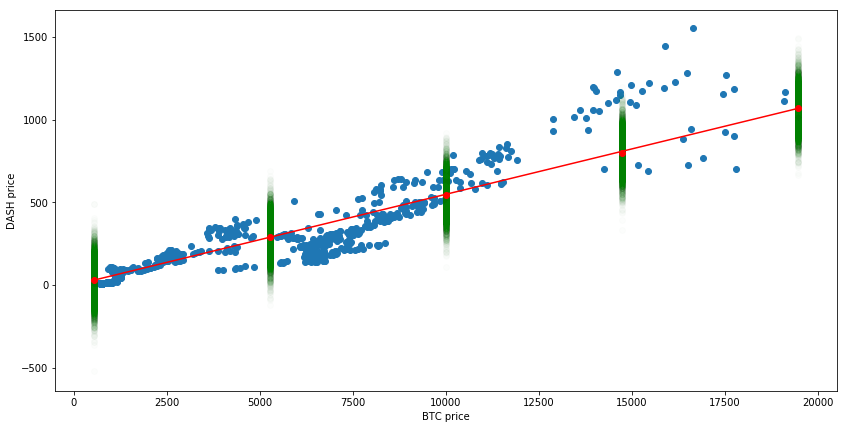

In [86]:
f, ax = plt.subplots(1, 1, figsize=(14,7), sharex=True)
preds = samples['ypreds'].T
ax.scatter(data['BTC price(USD)'], data['DASH price(USD)'])
ax.set_ylabel('DASH price')
ax.set_xlabel('BTC price')
ax.plot([p[0],p[-1]], [np.mean(preds[0]),np.mean(preds[-1])], c='r', alpha=1)
for i in range(m):
    ax.scatter([p[i]]*len(preds[i]),preds[i], alpha=0.01, c='g', marker="o")
    ax.scatter(p[i],np.mean(preds[i]), c='r')


Doing the same for the other big coins gives us the following predictions.
![title](prediction/predicting_big_coins.png)
Doing the same for small coins gives us the following predictions.
![title](prediction/predicting_small_coins.png)

Just by looking at the data we see that there a much weaker relationship between the price of small coins and bitcoin. Why might this be? We'll first, the time frame for the price observations is much smaller for the small coins, which is why we also had to narrow the time frame for bitcoin to between July 6th 2017 and November 29th 2018. This time period was much more voletile than the time period used to build the model when comparing the large coins. Other reasons could also however be at play.

## Discussion and Conclusions <a name="conclusions"></a>


### Further research

Unfortunatley we didn't have time to test out some of the other model ideas which we had, and only investigated the price.  
One of the things we would have liked to investigate is how trasactions are affected by the transaction fees.

We should also have spent more time researching prior research in the field to be able to set better priors for our models. Thankfully comprahensive cryptocurrency trading data is widely available and we managed to find good datasets with data quite far back in time.

## References <a name="references"></a>
* Coin Metrics, Data downloads. URL https://coinmetrics.io/data-downloads/ . (Online; accessed 27 November 2018)
* CoinMarketCap, Historical Snapshot - November 25, 2018. URL https://coinmarketcap.com/historical/20181125/ . (Online; accessed 30 November 2018)
* A Statistical Analysis of Cryptocurrencies. Stephen Chan, Jeffrey Chu, Saralees Nadarajah and Joerg Osterrieder, 31 May 2017. Journal of Risk and Financial Management.
* Michael Betancourt. Bayesian Workflow. URL: https://betanalpha.github.io/writing/ (Online; accessed 20 November 2018) (Link given by Aki Vehtari on one of the lectures)

## Appendix <a name="appendix"></a>

### Stan codes for price variation positive continuous distributions:

Data block for the different stan codes is the same, but parameters, model and thus generated quantities are somewhat different

### Price variation convergence results: